### Final project 
Rebecca McHugh

### Psuedo Code 

The main goal of this code is to import and analyze data from the air temperature sensor network in Boulder, Colorado.

1. Set working directory.

    os.path.join(et.io.HOME,'directory_name')
    
    
2. Import the files from the working directory. 

    glob(os.path.join('file_path_name', '*'))
    
    
 3. Create a function to import the csv files. 
 
     def import_csv_files(file_name): 
         pd.read_csv(file_name,
         index_col='Date Time Column Name',
         parse_dates=True)
          
    return downloaded_temp_csv
 
 
4. Import all files using a for loop. 

    files_list = {}
    for csv_path in temp_dir:
        files_list[csv_path] = import_temp_csv(csv_path)
    files_list.values()


5. Create a function to edit the files. 
    
    def edit_imported_temp_csv(imported_file):
        imported_file.drop(imported_file.columns[[]], axis=1, inplace=True
        imported_file.index.names = ['date_time']
        imported_file.columns.values[] = "temp_celsius"
        imported_file["temp_fahrenheit"] = celsius_to_fahr(
            imported_file["temp_celsius"])
        imported_file.drop(imported_file.columns[[]], axis=1, inplace=True)
    return imported_file
    
    
6. Create a function to take the daily mean temperature.

    def daily_mean (imported_file):
        imported_file.resample('D').mean()
 
 
7. Create a GeoDataFrame with all the locations of the sensors. 

    pd.DataFrame(
    {'sensor_name': [], 'latitude': [], 'longitude': []})
    
 
8. Use functions to create a number of different plots. 


9. Create a map with all the sensor locations on it. 

    folium.Map(
        location=[City],
        zoom_start=12,
        tiles='Stamen terrain')
        
    for site_location, site_df in site_list.groupby('sensor_location'):
        print([site_df.latitude.unique(), site_df.longitude.unique()])
        (folium.Marker([site_df.latitude.unique(), site_df.longitude.unique()])
         .add_to(map))

In [1]:
# Import necesscary packages.
import os

import earthpy as et
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import folium

In [2]:
# Set working directory.
temp_path = os.path.join(
    et.io.HOME,
    'earth-analytics',
    'data')
# Check if the path exists, if not create it.
if os.path.exists(temp_path):
    os.chdir(temp_path)
else:
    print('This path does not exist')
os.getcwd()

'/Users/rebeccamchugh/earth-analytics/data'

In [3]:
# Import csv files for temperature data.
temp_dir = glob(os.path.join('temperature-data', '*'))
temp_dir

['temperature-data/#008 2022-11-11 09_30_30 MST (Data MST).csv',
 'temperature-data/#041 2022-11-17 12_40_44 MST (Data MST).csv',
 'temperature-data/#035 2022-11-11 10_11_52 MST (Data MST).csv',
 'temperature-data/#037 2022-11-07 10_28_44 MST (Data MST).csv',
 'temperature-data/#011 2022-11-11 16_02_23 MST (Data MST).csv',
 'temperature-data/#006 2022-11-11 11_15_51 MST (Data MST).csv',
 'temperature-data/#009 2022-11-11 09_38_41 MST (Data MST).csv',
 'temperature-data/#004 2022-11-11 10_52_49 MST (Data MST).csv',
 'temperature-data/#022 2022-11-11 12_11_57 MST (Data MST).csv',
 'temperature-data/#018 2022-11-11 13_23_57 MST (Data MST).csv',
 'temperature-data/#036 2022-11-11 10_19_19 MST (Data MST).csv',
 'temperature-data/#017 replacement  2022-11-11 16_11_43 MST (Data MST).csv',
 'temperature-data/#019 replacement  2022-11-11 13_12_35 MST (Data MST).csv',
 'temperature-data/#043 2022-11-07 09_56_38 MST (Data MST).csv',
 'temperature-data/#001 2022-11-11 10_28_13 MST (Data MST).csv',

In [4]:
# Import one csv file.
def import_temp_csv(file_name):
    """
    Download an air temperature csv file.

    Function will allow a different csv file to be downloaded and edited to 
    required specifications.

    Paramterers.
    ----------
    file_name : str
      The name of the file.

    Returns
    --------
    Imported csv. 
        The requested and edited csv file.
    """

    # Read csv and make the date time column the index.
    downloaded_temp_csv = pd.read_csv(file_name,
                                      index_col='Date-Time (MST/MDT)',
                                      parse_dates=True)
    return downloaded_temp_csv


sensor_001 = import_temp_csv(
    'temperature-data/#001 2022-11-11 10_28_13 MST (Data MST).csv')
sensor_002 = import_temp_csv(
    'temperature-data/#002 2022-11-11 10_36_26 MST (Data MST).csv')
sensor_003 = import_temp_csv(
    'temperature-data/#003 2022-11-11 10_47_00 MST (Data MST).csv')
# sensor_004 = import_temp_csv(
#     'temperature-data/#004 2022-11-11 10_52_49 MST (Data MST).csv')
# sensor_005 = import_temp_csv(
#     'temperature-data/#005 2022-11-11 11_20_41 MST (Data MST).csv')
# sensor_006 = import_temp_csv(
#     'temperature-data/#006 2022-11-11 11_15_51 MST (Data MST).csv')
# sensor_007 = import_temp_csv(
#     'temperature-data/#007 2022-11-11 11_03_24 MST (Data MST).csv')
# sensor_008 = import_temp_csv(
#     'temperature-data/#008 2022-11-11 09_30_30 MST (Data MST).csv')
# sensor_009 = import_temp_csv(
#     'temperature-data/#009 2022-11-11 09_38_41 MST (Data MST).csv')
# sensor_010 = import_temp_csv(
#     'temperature-data/#010 2022-11-11 16_21_51 MST (Data MST).csv')
# sensor_011 = import_temp_csv(
#      'temperature-data/#011 2022-11-11 16_02_23 MST (Data MST).csv')
# sensor_012 = import_temp_csv(
#     'temperature-data/#012 2022-11-11 15_53_42 MST (Data MST).csv')
# sensor_013 = import_temp_csv(
#     'temperature-data/#013 2022-11-11 15_45_03 MST (Data MST).csv')
# sensor_014 = import_temp_csv(
#     'temperature-data/#014 2022-11-11 13_55_43 MST (Data MST).csv')
# sensor_015 = import_temp_csv(
#     'temperature-data/#015 2022-11-11 14_04_39 MST (Data MST).csv')
# sensor_017 = import_temp_csv(
#     'temperature-data/#017 replacement  2022-11-11 16_11_43 MST (Data MST)'
#     '.csv')
# sensor_018 = import_temp_csv(
#     'temperature-data/#018 2022-11-11 13_23_57 MST (Data MST).csv')
# sensor_019 = import_temp_csv(
#     'temperature-data/#019 replacement  2022-11-11 13_12_35 MST (Data MST)'
#     '.csv')
# sensor_022 = import_temp_csv(
#     'temperature-data/#022 2022-11-11 12_11_57 MST (Data MST).csv')
# sensor_026 = import_temp_csv(
#     'temperature-data/#026 2022-11-16 14_20_18 MST (Data MST).csv')
# sensor_028 = import_temp_csv(
#     'temperature-data/#028 2022-11-11 15_35_31 MST (Data MST).csv')
# sensor_029 = import_temp_csv(
#     'temperature-data/#029 2022-11-11 13_37_51 MST (Data MST).csv')
# sensor_030 = import_temp_csv(
#      'temperature-data/#030 2022-11-11 16_29_14 MST (Data MST).csv',)
# sensor_031 = import_temp_csv(
#     'temperature-data/#031 2022-11-11 10_02_58 MST (Data MST).csv')
# sensor_035 = import_temp_csv(
#     'temperature-data/#035 2022-11-11 10_11_52 MST (Data MST).csv')
# sensor_036 = import_temp_csv(
#     'temperature-data/#036 2022-11-11 10_19_19 MST (Data MST).csv')
# sensor_037 = import_temp_csv(
#      'temperature-data/#037 2022-11-07 10_28_44 MST (Data MST).csv')
# sensor_039 =  import_temp_csv(
#     'temperature-data/#039 2022-11-11 15_37_26 MST (Data MST).csv')
# sensor_40 = import_temp_csv(
#     'temperature-data/#040 2022-11-11 09_58_05 MST (Data MST).csv')
# sensor_041 = import_temp_csv(
#     'temperature-data/#041 2022-11-17 12_40_44 MST (Data MST).csv')
# sensor_042 = import_temp_csv(
#     'temperature-data/#042 2022-11-17 12_31_34 MST (Data MST).csv')
sensor_043 = import_temp_csv(
    'temperature-data/#043 2022-11-07 09_56_38 MST (Data MST).csv')

In [5]:
# Import all the sensors using a for loop.
files_list = {}
for csv_path in temp_dir:
    files_list[csv_path] = import_temp_csv(csv_path)
files_list.values()

dict_values([                         #  Ch: 1 - Temperature   (°C ) Host Connected  \
Date-Time (MST/MDT)                                                      
2022-05-24 17:00:18      1                          NaN         Logged   
2022-05-26 08:00:00      2                        22.48            NaN   
2022-05-26 08:05:00      3                        22.39            NaN   
2022-05-26 08:10:00      4                        22.35            NaN   
2022-05-26 08:15:00      5                        22.35            NaN   
...                    ...                          ...            ...   
2022-11-11 09:10:00  48705                        -5.24            NaN   
2022-11-11 09:15:00  48706                        -5.07            NaN   
2022-11-11 09:20:00  48707                        -4.89            NaN   
2022-11-11 09:25:00  48708                        -4.55            NaN   
2022-11-11 09:27:45  48709                          NaN         Logged   

                    End 

In [6]:
# Function to convert celsius to fahrenheit.
def celsius_to_fahr(temp_c):
    """Convert celsius to fahrenheit."""
    temp_fahr = (temp_c * 1.8) + 32
    return temp_fahr

In [7]:
# Create a function to edit imported csv.
def edit_imported_temp_csv(sensor_number):
    """Edit sensor data to the correct parameters."""
    # Delete unnecessary columns.
    sensor_number.drop(sensor_number.columns[[0, 2, 3]], axis=1, inplace=True)
    # Rename column headers.
    sensor_number.index.names = ['date_time']
    sensor_number.columns.values[0] = "temp_celsius"
    # Convert degrees celsius to degrees fahrenheit.
    sensor_number["temp_fahrenheit"] = celsius_to_fahr(
        sensor_number["temp_celsius"])
    # Remove temp_celsius column.
    sensor_number.drop(sensor_number.columns[[0]], axis=1, inplace=True)
    return sensor_number


edit_imported_temp_csv(sensor_001)
edit_imported_temp_csv(sensor_002)
edit_imported_temp_csv(sensor_003)
edit_imported_temp_csv(sensor_043)

,temp_fahrenheit
date_time,
2022-06-20 16:05:00,75.092
2022-06-20 16:10:00,75.776
2022-06-20 16:15:00,75.704
2022-06-20 16:20:00,75.470
2022-06-20 16:25:00,75.092
...,...
2022-11-07 09:35:00,44.420
2022-11-07 09:40:00,44.744
2022-11-07 09:45:00,44.348


In [8]:
# Calculate the daily mean.
def daily_mean(sensor_number):
    """Calculate the daily mean temperature of each sensor."""
    mean_temp_sensor_number = sensor_number.resample('D').mean()
    return mean_temp_sensor_number


mean_temp_sensor_002 = daily_mean(sensor_002)
mean_temp_sensor_003 = daily_mean(sensor_003)
mean_temp_sensor_043 = daily_mean(sensor_043)
mean_temp_sensor_043

,temp_fahrenheit
date_time,
2022-06-20,73.229853
2022-06-21,73.250187
2022-06-22,73.248562
2022-06-23,73.463125
2022-06-24,71.022437
...,...
2022-11-03,34.592875
2022-11-04,30.632875
2022-11-05,44.379438


In [9]:
# Create a gdf of the sensor name and location.
sensor_sites_list = pd.DataFrame(
    {'sensor_name': ['sensor_001',
                     'sensor_002',
                     'sensor_003',
                     'sensor_004',
                     'sensor_005',
                     'sensor_006',
                     'sensor_007',
                     'sensor_008',
                     'sensor_009',
                     'sensor_010',
                     'sensor_011',
                     'sensor_012',
                     'sensor_013',
                     'sensor_014',
                     'sensor_015',
                     'sensor_016',
                     'sensor_017',
                     'sensor_018',
                     'sensor_019',
                     'sensor_020',
                     'sensor_021',
                     'sensor_022',
                     'sensor_023',
                     'sensor_024',
                     'sensor_025',
                     'sensor_026',
                     'sensor_027',
                     'sensor_028',
                     'sensor_029',
                     'sensor_030',
                     'sensor_031',
                     'sensor_032',
                     'sensor_033',
                     'sensor_034',
                     'sensor_035',
                     'sensor_036',
                     'sensor_037',
                     'sensor_038',
                     'sensor_039',
                     'sensor_040',
                     'sensor_041',
                     'sensor_042',
                     'sensor_043'],
     'latitude': [40.01529,
                  40.02051,
                  40.0272858,
                  40.0288062,
                  40.056943,
                  40.05773,
                  40.05564,
                  40.00722,
                  40.0090042,
                  39.97694,
                  39.99494,
                  39.99988,
                  40.0028563,
                  40.01493,
                  40.01512,
                  40.0731603,
                  39.98402,
                  40.03176,
                  40.044624,
                  40.043928,
                  40.086,
                  40.054629,
                  40.07784,
                  40.064132,
                  40.06213,
                  40.0332328,
                  40.01667,
                  40.0111700,
                  40.018508,
                  39.9730290,
                  40.0118932,
                  39.99735,
                  39.9987025,
                  39.9999017,
                  40.0139711,
                  40.0134418,
                  39.934941,
                  40.037323,
                  40.026377,
                  40.0120372,
                  40.21291,
                  40.04429,
                  40.0257],
     'longitude': [-105.28639,
                   -105.29113,
                   -105.2872161,
                   -105.2875383,
                   -105.290043,
                   -105.2883,
                   -105.28424,
                   -105.27949,
                   -105.2843139,
                   -105.26022,
                   -105.23594,
                   -105.22941,
                   -105.2516369,
                   -105.23615,
                   -105.22528,
                   -105.2020412,
                   -105.23961,
                   -105.24959,
                   -105.246515,
                   -105.244840,
                   -105.21118,
                   -105.262655,
                   -105.28233,
                   -105.284495,
                   -105.28199,
                   -105.2754479,
                   -105.2504,
                   -105.2542729,
                   -105.256018,
                   -105.2495512,
                   -105.2675196,
                   -105.29921,
                   -105.2959701,
                   -105.2957703,
                   -105.2850948,
                   -105.2941583,
                   -105.266901,
                   -105.292483,
                   -105.224478,
                   -105.2723530,
                   -105.27719,
                   -105.29278,
                   -105.2898]})
sensor_sites_list.set_index('sensor_name', inplace=True)

sensor_sites_list.head()

,latitude,longitude
sensor_name,,
sensor_001,40.015290,-105.286390
sensor_002,40.020510,-105.291130
sensor_003,40.027286,-105.287216
sensor_004,40.028806,-105.287538
sensor_005,40.056943,-105.290043


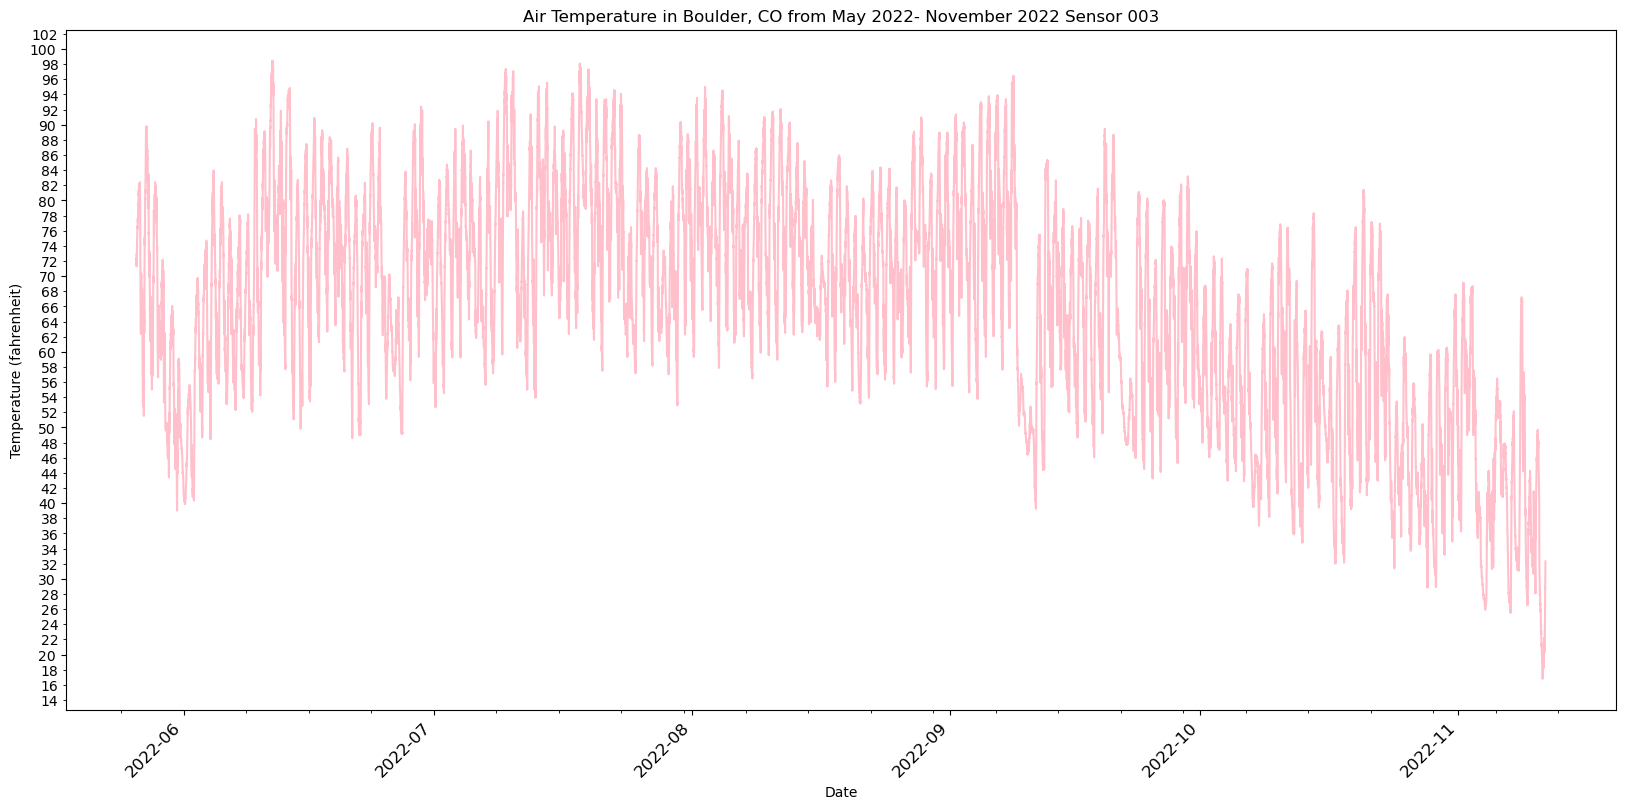

In [10]:
# Create a plot for air temperature for each reading.
def plot_temp_minute(sensor_number, title):
    # Create plot layout.
    ig, (ax1) = plt.subplots(
        1, figsize=(20, 10))
    ax = ax1
    # Add information to plot.
    sensor_number['temp_fahrenheit'].plot(
        ax=ax1,
        rot=60,
        title=title,
        xlabel='Date',
        ylabel='Temperature (fahrenheit)',
        color='pink',
        legend='')
    # Adjust tick marks on the x-axis.
    ax1.tick_params(axis='x', labelrotation=45, labelsize='large')
    # Add minor ticks in between larger ticks and label minor ticks.
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.f"))
    # Add more ticks for the date axis.


plot_temp_minute(sensor_003,
                 'Air Temperature in Boulder, CO from May 2022'
                 '- November 2022 Sensor 003')

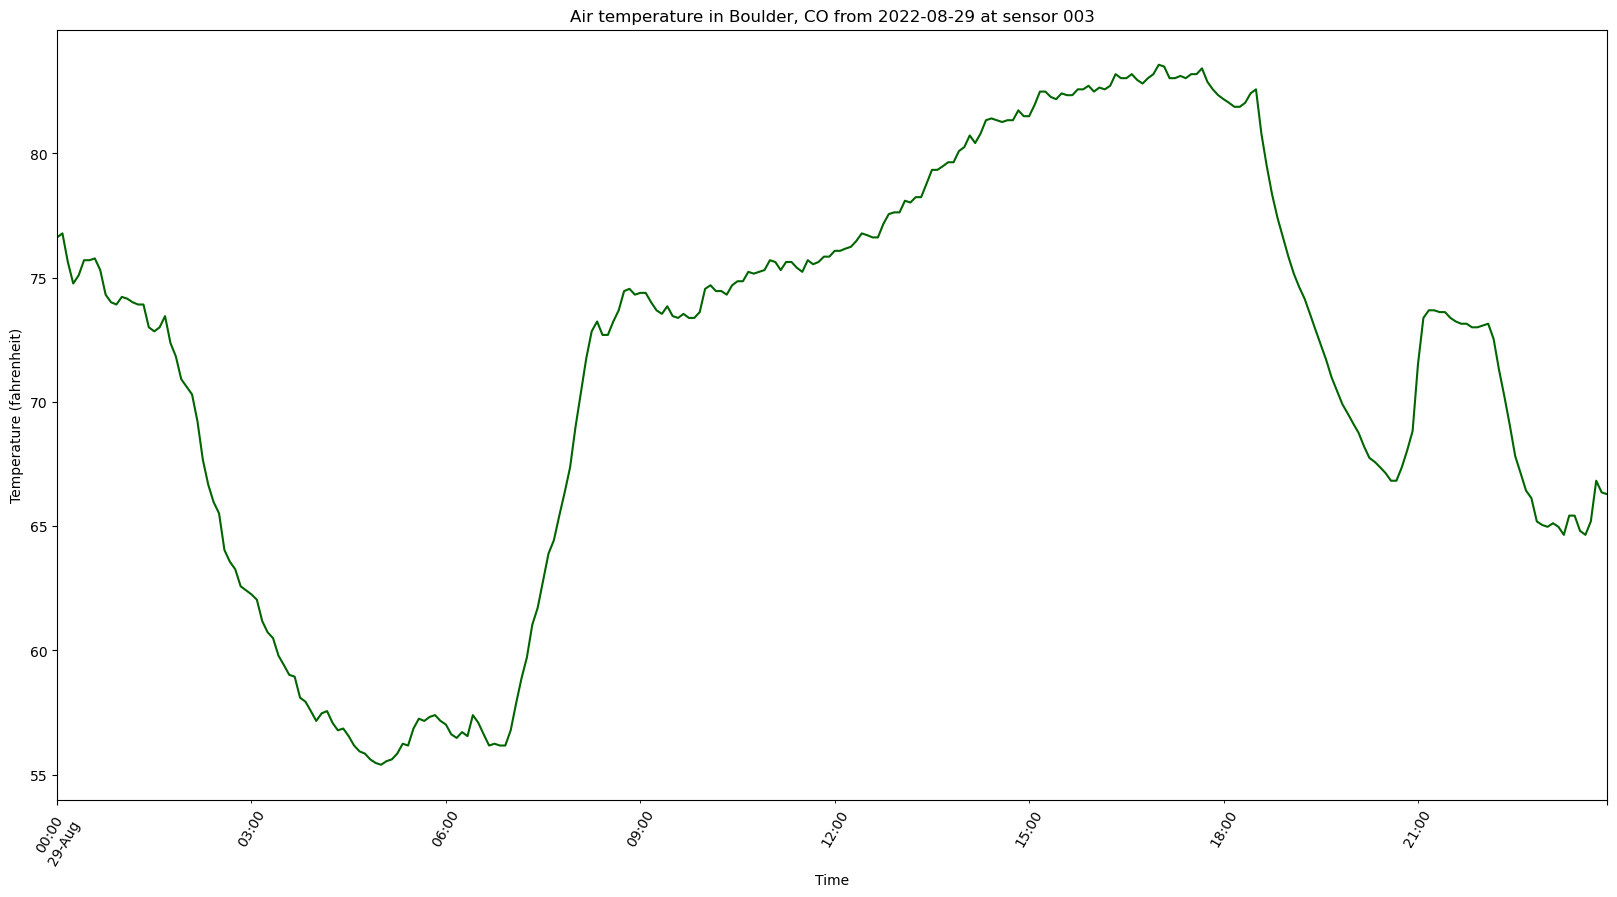

In [11]:
# Create a plot to graph just a single day.
def plot_temp_subset_date(sensor_number, date, title):
    # Subset the data to preferred number
    sensor_subset = sensor_number.loc[date]
    # Create plot layout.
    ig, (ax1) = plt.subplots(
        1, figsize=(20, 10))
    ax = ax1
    # Add information to plot.
    sensor_subset['temp_fahrenheit'].plot(
        ax=ax1,
        rot=60,
        title=title,
        xlabel='Time',
        ylabel='Temperature (fahrenheit)',
        color='darkgreen',
        legend='')


plot_temp_subset_date(sensor_003,
                      '2022-08-29',
                      'Air temperature in Boulder, CO'
                      ' from 2022-08-29 at sensor 003')

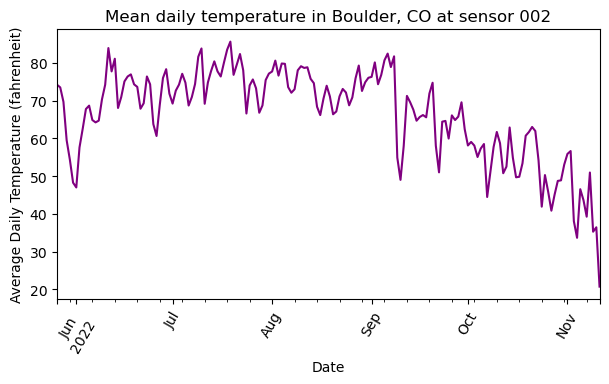

In [12]:
# Create a graph to plot the daily average mean.
def plot_daily_mean(daily_mean_sensor_number, title):
    (fig, ax) = plt.subplots(1, 1, figsize=[7.00, 3.50])
    daily_mean_sensor_number['temp_fahrenheit'].plot(
        ax=ax,
        rot=60,
        title=title,
        xlabel='Date',
        ylabel='Average Daily Temperature (fahrenheit)',
        color='purple',
        legend='')


plot_daily_mean(mean_temp_sensor_002,
                'Mean daily temperature in Boulder, CO at sensor 002')

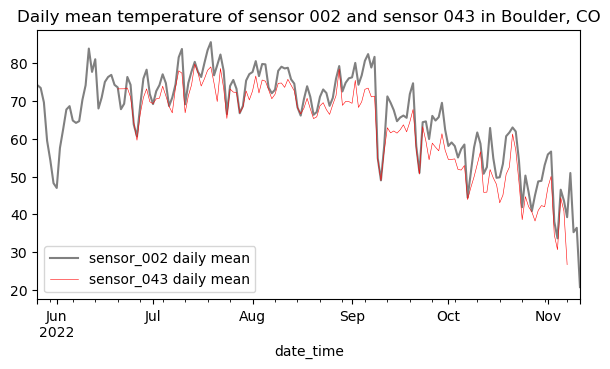

In [13]:
# Create one plot with two sensors
def plot_temp_minute_two(sensor_number_1,
                         sensor_number_2,
                         label_sensor_1,
                         label_sensor_2,
                         title):
    (fig, ax) = plt.subplots(1, 1, figsize=[7.00, 3.50])

    df1 = sensor_number_1
    df2 = sensor_number_2

    df1.plot(y='temp_fahrenheit', ax=ax, color='grey', label=label_sensor_1)
    df2.plot(y='temp_fahrenheit', ax=ax, color='red', label=label_sensor_2,
             linewidth=0.4,
             title=title)

    plt.show()


plot_temp_minute_two(mean_temp_sensor_002,
                     mean_temp_sensor_043,
                     'sensor_002 daily mean',
                     'sensor_043 daily mean',
                     'Daily mean temperature of sensor 002 and sensor 043'
                     ' in Boulder, CO')

In [14]:
# Create a map of the sensors.
sensor_map = folium.Map(
    location=[40.0150, -105.2705],
    zoom_start=12,
    tiles='Stamen terrain')
# Add sensor locations to map.
for sensor_name, site_df in sensor_sites_list.groupby('sensor_name'):
    print([site_df.latitude.unique(), site_df.longitude.unique()])
    (folium.Marker([site_df.latitude.unique(), site_df.longitude.unique()])
     .add_to(sensor_map))
sensor_map

[array([40.01529]), array([-105.28639])]
[array([40.02051]), array([-105.29113])]
[array([40.0272858]), array([-105.2872161])]
[array([40.0288062]), array([-105.2875383])]
[array([40.056943]), array([-105.290043])]
[array([40.05773]), array([-105.2883])]
[array([40.05564]), array([-105.28424])]
[array([40.00722]), array([-105.27949])]
[array([40.0090042]), array([-105.2843139])]
[array([39.97694]), array([-105.26022])]
[array([39.99494]), array([-105.23594])]
[array([39.99988]), array([-105.22941])]
[array([40.0028563]), array([-105.2516369])]
[array([40.01493]), array([-105.23615])]
[array([40.01512]), array([-105.22528])]
[array([40.0731603]), array([-105.2020412])]
[array([39.98402]), array([-105.23961])]
[array([40.03176]), array([-105.24959])]
[array([40.044624]), array([-105.246515])]
[array([40.043928]), array([-105.24484])]
[array([40.086]), array([-105.21118])]
[array([40.054629]), array([-105.262655])]
[array([40.07784]), array([-105.28233])]
[array([40.064132]), array([-105.